In [2]:
%load_ext autoreload
%autoreload 2
import math
import matplotlib.pyplot as plt
import numpy as np
import torch
from diffuse.noise_scheduler import NoiseScheduler
from diffuse.data import toy_datasets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
timesteps.dtype

torch.int64

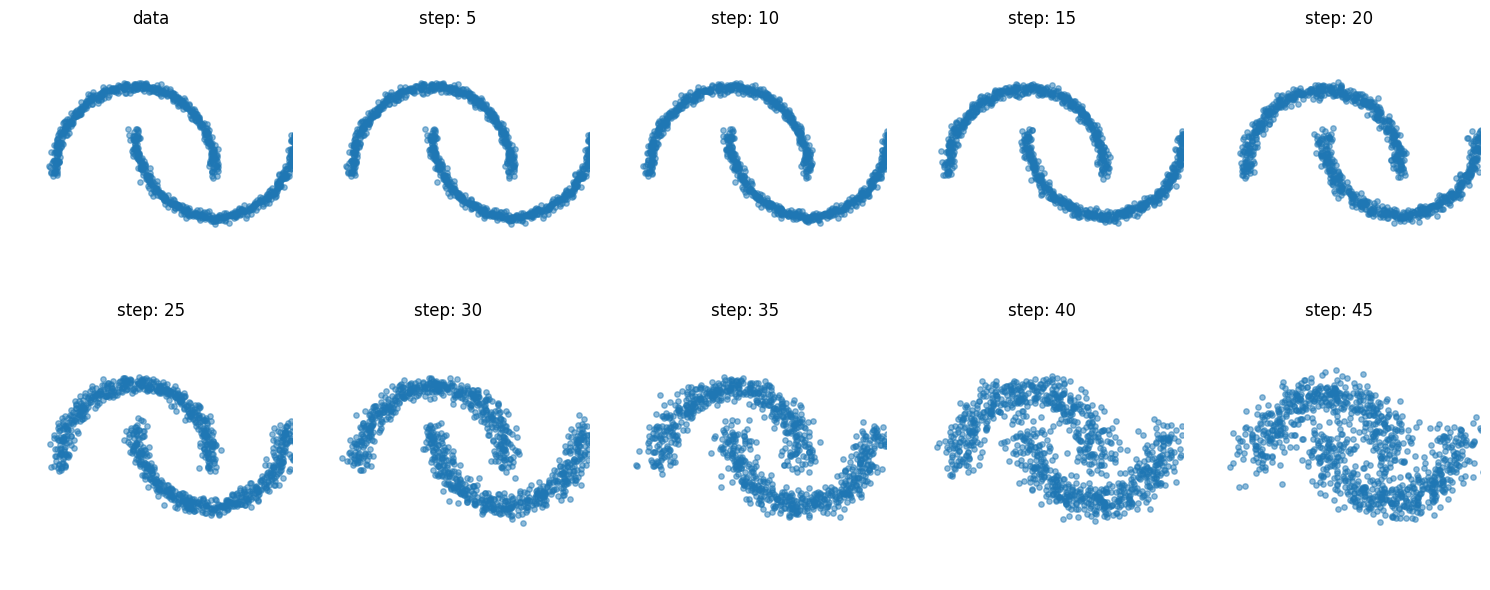

In [23]:
n_timesteps = 50
plot_step = 5

num_plots = math.ceil(n_timesteps / plot_step)
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig = plt.figure(figsize=(15, 6))

noise_scheduler = NoiseScheduler(beta1=.0001,beta2=.02,n_timesteps=n_timesteps)
dataset = toy_datasets.get_dataset("moons", n=1000)
x0 = dataset.tensors[0]

plt_cnt = 1
plt.subplot(num_rows, num_cols, plt_cnt)
plt.scatter(x0[:, 0], x0[:, 1], alpha=0.5, s=15)
plt.title("data")
plt.xlim(-3.5, 3.5)
plt.ylim(-4., 4.75)
plt.axis("off")
        
for t in range(len(noise_scheduler)):
    timesteps = torch.tensor(t).repeat(len(x0))
    noise = torch.randn_like(x0)
    sample = noise_scheduler.add_noise(x0, timesteps, noise)
    if (t + 1) % plot_step == 0 and (t + 1) != len(noise_scheduler):
        plt_cnt += 1
        plt.subplot(num_rows, num_cols, plt_cnt)
        plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5, s=15)
        plt.title(f"step: {t + 1}")
        plt.xlim(-3.5, 3.5)
        plt.ylim(-4., 4.75)
        plt.axis("off")
        
fig.tight_layout()
# plt.savefig("static/forward.png", facecolor="white")
plt.show()

# Last timestep

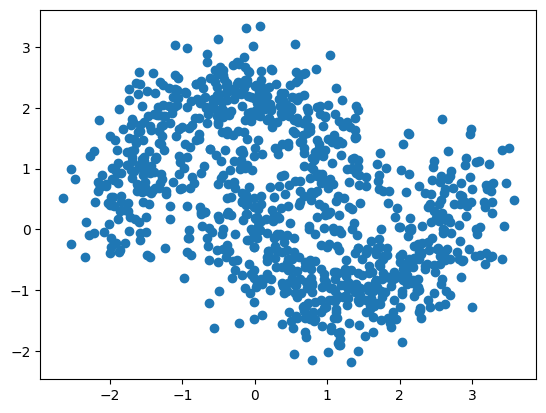

In [34]:
t = 49
timesteps = torch.tensor(t).repeat(len(x0))
noise = torch.randn_like(x0)
sample = noise_scheduler.add_noise(x0, timesteps, noise)
plt.scatter(sample[:,0],sample[:,1])

# Noise one step at a time and confirm it matches add_noise


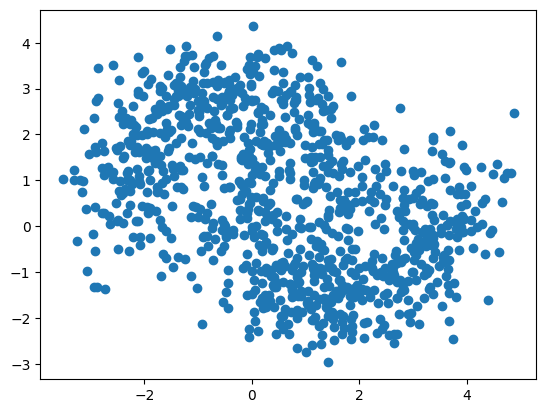

In [30]:

x0 = dataset.tensors[0]
noised = [x0]
xt = x0
for t in range(len(noise_scheduler)):
    betas = noise_scheduler.b_t
    noise = torch.randn_like(xt)
    xt = noise*torch.sqrt(betas[t]) + xt
    noised.append(xt)
t=45
plt.scatter(noised[t][:,0],noised[t][:,1])

tensor([[-0.8037,  1.3029],
        [ 0.2174, -1.1614],
        [ 1.0262, -0.5476],
        ...,
        [ 2.4823, -1.0487],
        [-1.7375,  0.6414],
        [ 2.1799,  1.5155]])